In [1]:
import pandas as pd
import pickle

In [2]:
import scanpy as sc
from nltk.tokenize import sent_tokenize

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
import numpy as np

In [4]:
disc=pd.read_csv("sub_dup_books.csv")

C:\Users\lucia\AppData\Local\Temp\ipykernel_13008\2937466995.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  disc=pd.read_csv("sub_dup_books.csv")


In [5]:
def filt(sents):
    ret=[]
    for s in sents:
        if len(s)>45:
            ret.append(s)
    return ret


In [6]:
meta=pd.read_csv("meta.csv")

In [7]:
meta=meta[meta["done"]==1]

In [8]:
meta=meta.drop_duplicates("id")

In [9]:
f = open("spen.txt", "r", encoding="utf-8")
text=f.read()
f.close()
text=text.replace("\n"," ")
text=text.split("TO THE REVISED AND ENLARGED EDITION.")[1]

text=text.split("at the same time I willingly admit that, in the absence of certain statements which I have now supplied, he was not unwarranted in representing my conception in the way that he has done.")[0]

text=text.strip()

spen_text=filt(sent_tokenize(text))

In [10]:
meta["lens"]=np.log10(meta["lens"])

C:\Users\lucia\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
meta["lens"]=meta["lens"].clip(lower=3)
#meta["lens"]=meta["lens"].clip(upper=1000000)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

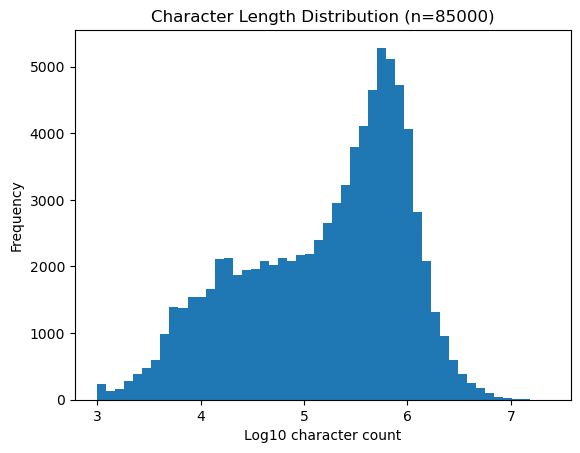

In [13]:
meta["lens"].plot.hist(title="Character Length Distribution (n=85000)", xlabel="Log10 character count", bins= 50)

plt.savefig("length.svg")

In [14]:
meta["date"]=meta["date"].clip(lower=1800)


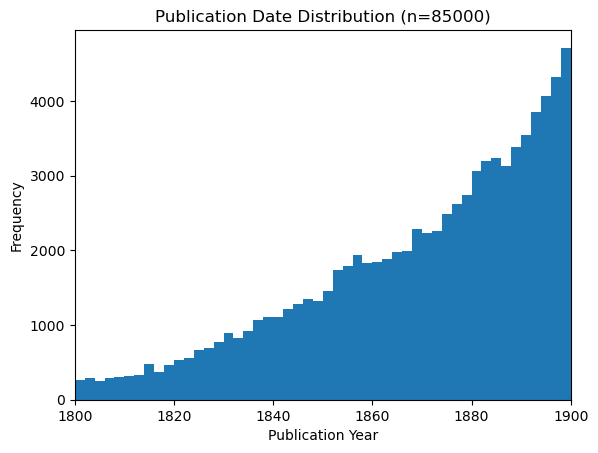

In [15]:
meta["date"].plot.hist(title="Publication Date Distribution (n=85000)", xlabel="Publication Year", bins= 50)
plt.margins(x=0)
plt.savefig("date.svg")


In [16]:
embs=["dom","oos","spen", "soc", "echoesfrombackwo00levi_0", "paper-doi-10_1098_rspl_1859_0004" , "formofhorseasitl00cars"]
all=pd.DataFrame()
for e in embs:
    for i in range(0, 85000,5000):
        temp=pd.read_csv("matches/"+e+"/"+str(i)+".csv")
        temp["source"]=[e]*len(temp["score"])
        all=pd.concat((all,temp),axis=0)

In [17]:
all

,Unnamed: 0,orig_index,match_id,match_ind,score,source
0,0,0,in.ernet.dli.2015.200542,20,0.955913,dom
1,1,0,in.ernet.dli.2015.216923,17,0.936546,dom
2,2,1,in.ernet.dli.2015.200542,21,1.000000,dom
3,3,1,in.ernet.dli.2015.216923,18,1.000000,dom
4,4,2,biostor-236874,14,0.910521,dom
...,...,...,...,...,...,...
5734,5734,1390,b29309943,6207,0.901983,formofhorseasitl00cars
5735,5735,1392,perfecthorseho00murr,2670,0.902826,formofhorseasitl00cars
5736,5736,1393,a633785200stanuoft,10,0.900349,formofhorseasitl00cars
5737,5737,1393,essayonweartearo00hayd,4,0.915512,formofhorseasitl00cars


In [82]:
#meta=pd.read_csv("sub_books.csv")

In [83]:
#bio=pd.read_csv("bio_auth_books.csv")
#bio2=pd.read_csv("bio_auth_books2.csv")
#bio=pd.concat((bio,bio2),axis=0)
#meta=pd.concat((bio,meta),axis=0)

In [18]:
f = open("oos.txt", "r", encoding="utf-8")
text=f.read()
f.close()
text=text.replace("\n"," ")
text=text.split("When on board H.M.S. ‘Beagle,’ as naturalist,")[1]
text=text.split("from so simple a beginning endless forms most beautiful and most wonderful have been, and are being, evolved.")[0]
text+="from so simple a beginning endless forms most beautiful and most wonderful have been, and are being, evolved."
text=text.strip()
origin= filt(sent_tokenize(text))

In [19]:
all["source"].value_counts()

source
dom                                 942780
spen                                560790
oos                                 526045
soc                                 299777
echoesfrombackwo00levi_0            123037
formofhorseasitl00cars               90878
paper-doi-10_1098_rspl_1859_0004     11236
Name: count, dtype: int64

In [20]:
id=["principlessocio24spengoog","principlesofsoci0001herb","OnTheOriginOfSpeciesCharlesDarwin1859","B-001-004-417", "rmcg0005", "onoriginspeciesf00darw", "descentmanandse06darwgoog", "descentman00darwgoog", "in.ernet.dli.2015.44749", "in.ernet.dli.2015.23341", "dli.bengal.10689.8900", 'in.ernet.dli.2015.32860', 'in.ernet.dli.2015.216923', 'in.ernet.dli.2015.200542', 'NHM_UK_L_263066', 'originofspeciesb0000char_r3i3', 'originspeciesby04darwgoog', 'in.ernet.dli.2015.271854', 'onoriginspecies03darwgoog', 'originspeciesby02darwgoog', 'onoriginspecies02darwgoog', 'onoriginspecies00dallgoog', 'ThePrinciplesOfBiology', 'in.ernet.dli.2015.42287', 'in.ernet.dli.2015.222367', 'B-001-002-950', 'onoriginspecies04darwgoog', 'in.ernet.dli.2015.22432', 'principlesofbiol028813mbp', 'in.ernet.dli.2015.220745', 'in.ernet.dli.2015.201782', 'principlesbiolo05spengoog', 'in.ernet.dli.2015.23497', 'dli.bengal.10689.8910', 'originofspecies0000char_v2b1', 'in.ernet.dli.2015.191205', 'originspeciesby00darwgoog', 'originofspeciesb028812mbp', 'originofspecies0002char_a9d5', 'echoesfrombackw00levigoog', 'cihm_45541',
       'McGillLibrary-rbsc_lc_echoes-from-the-backwoods_00536-v1-18218',
       'echoesfrombackw04levigoog', 'dli.bengal.10689.14183',
       'in.ernet.dli.2015.68965', 'in.ernet.dli.2015.21393',
       'dli.bengal.10689.22974', 'dli.bengal.10689.16681',
       'in.ernet.dli.2015.21385', 'dli.bengal.10689.23776']
all=all[~all['match_id'].isin(id)]


In [22]:
dom=all[all["source"]=="dom"]
spen=all[all["source"]=="spen"]
oos=all[all["source"]=="oos"]

In [23]:
spen_text[3626]

'It is not enough to say that we cannot know it; we must say that we cannot even conceive it.'

In [24]:
dom["orig_index"].value_counts().head(20)

orig_index
4309    2905
4866    2747
4140    2717
5040    2644
2649    2552
3262    2510
2364    2161
4740    2161
3360    2123
110     2016
1675    1983
988     1959
19      1959
7495    1912
6243    1908
6662    1858
6673    1821
4241    1787
1592    1765
4721    1763
Name: count, dtype: int64

In [27]:
oos

,Unnamed: 0,orig_index,match_id,match_ind,score,source
0,0,0,B-001-002-942,54,0.902550,oos
1,1,0,B-001-002-946,28,0.902550,oos
6,6,0,charlesdarwinhi01darwgoog,632,0.918976,oos
7,7,0,geologicalobser00etcgoog,1277,0.911175,oos
8,8,0,geologicalobser00fggoog,20,0.900440,oos
...,...,...,...,...,...,...
8469,8469,3819,naturaltheologyg00stok,320,0.903053,oos
8470,8470,3821,lowelllectureso00drumgoog,459,0.921123,oos
8471,8471,3821,lowelllectureso02drumgoog,449,0.938484,oos
8472,8472,3821,lowelllectureson0000henr,425,0.934361,oos


In [26]:
origin[1049]

'Natural selection, as has just been remarked, leads to divergence of character and to much extinction of the less improved and intermediate forms of life.'

In [28]:
merged=all.merge(meta[["id", "date"]], left_on="match_id",right_on="id", how="left")

In [29]:
merged=merged.drop_duplicates(subset=["match_id", "source", "orig_index", "match_ind"])

In [30]:
merged["date"].isna().sum()

0

In [35]:
oos=merged[merged["source"]=="oos"]

In [110]:
prev=oos[oos["date"]<1859]
prev=prev[prev["score"]>0.92]

In [112]:
print(set(merged["author"]))

{"['Fitch, W. H.', 'Hooker, Joseph Dalton,', 'Reeve Brothers.']", 'Milner, Thomas, d. 1882', 'Jean Joseph Louis Blanc', 'John Anderson', 'Powell, Baden, 1796-1860', 'John Abercrombie', "['Lovejoy, Joseph C. (Joseph Cammet), 1805-1871', 'Lovejoy, Owen, 1811-1864', 'Adams, John Quincy, 1767-1848']", 'Thompson, George. [from old catalog]', 'Candlish, Robert Smith, 1806-1873', 'Charles Hamilton Smith, Samuel Kneeland', "['Roberts, William, 1767-1849', 'Nicholson, William. Purity of the ministry']", 'Edinburgh. Royal Observatory', "['Buffon, Georges Louis Leclerc, comte de, 1707-1788', 'Wright, John, F.Z.S']", 'Whewell, William, 1794-1866. [from old catalog]', 'Smith, Robert, 1752-1838', 'George Poulett Scrope', '[\'Cooper, Astley, Sir, 1768-1841\', \'Lister, Joseph, Baron, 1827-1912 former owner\', "Physical Society (Guy\'s Hospital) former owner", "St. Thomas\'s Hospital. Medical School Library former owner", "King\'s College London"]', 'Miller, Hugh, 1802-1856', 'Rham, W. L. (William Lew

In [113]:
prev=prev.drop_duplicates(subset=["match_id","orig_index"])

In [114]:
prev["match_id"].value_counts().head(10)

match_id
darwin-wallace-1858-journalofproceed-00linn    16
b29304465                                      15
journalresearche00darw_290                     14
b2191574x                                      14
journalofresearc00darw                         14
in.ernet.dli.2015.43332                        13
in.ernet.dli.2015.222755                       12
treatisemineralogy00sheprich                   12
bwb_KR-563-516                                 11
in.ernet.dli.2015.206952                       11
Name: count, dtype: int64

In [127]:
merged=prev.merge(meta, left_on="match_id",right_on="id", how="left")

In [153]:
small=merg

title
Hebrew records; an historical enquiry concerning the age, authorship, and authenticity of the old testament                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            1
First lines of the practice of physic (Volume 2)                                                                                                                                         

In [183]:
matches=merged[merged["title"].str.contains('India')]

In [184]:
matches

,Unnamed: 0_x,orig_index,match_id,match_ind,score,source,id_x,date_x,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0_y,id_y,subject,title,author,date_y,done,lens
515,13016,817,journalofembassy11834craw,1474,0.920937,oos,journalofembassy11834craw,1834,495,812.0,812,journalofembassy11834craw,"Buckland, William",Journal of an embassy from the governor genera...,"['Crawfurd, John, 1783-1868', 'Buckland, Willi...",1834,1,5.845674
983,20092,1545,mobot31753002504691,23,0.927287,oos,mobot31753002504691,1835,7293,13443.0,13443,mobot31753002504691,"Bentham, George",Scrophularinaea Indicae ?A synopsis of the Eas...,"Bentham, George,",1835,1,5.064181
996,21982,1738,mobot31753002504691,23,0.928033,oos,mobot31753002504691,1835,7293,13443.0,13443,mobot31753002504691,"Bentham, George",Scrophularinaea Indicae ?A synopsis of the Eas...,"Bentham, George,",1835,1,5.064181
1039,25742,2142,letterstoindian00mitcgoog,217,0.927127,oos,letterstoindian00mitcgoog,1857,8574,15497.0,15497,letterstoindian00mitcgoog,"Murray, John, Jr",Letters to Indian Youth on the Evidences of th...,John Murray Mitchell,1857,1,5.593573
1126,423,48,viewofpresentsta00craw,1278,0.942170,oos,viewofpresentsta00craw,1829,12633,23673.0,23673,viewofpresentsta00craw,"Crawfurd, John",A view of the present state and future prospec...,"Crawfurd, John, 1783-1868",1829,1,5.432458
1135,1096,73,afj1354.0001.001.umich.edu,3278,0.924681,oos,afj1354.0001.001.umich.edu,1820,12591,23606.0,23606,afj1354.0001.001.umich.edu,"Crawfurd, John",History of the Indian Archipelago : containing...,"Crawfurd, John, 1783-1868",1820,1,5.872283
1136,1097,73,b29350839_0001,3299,0.924681,oos,b29350839_0001,1820,12594,23615.0,23615,b29350839_0001,"Crawfurd, John",History of the Indian Archipelago. Containing ...,"Crawfurd, John, 1783-1868. n 50019069",1820,1,5.876524
1137,1098,73,bub_gb__r_u9uLogWEC,3411,0.924681,oos,bub_gb__r_u9uLogWEC,1820,12595,23618.0,23618,bub_gb__r_u9uLogWEC,"Crawfurd, John",History of the Indian Archipelago. Containing ...,"Crawfurd, John",1820,1,5.876017
1138,1102,73,CrawfurdArchipelago18201,3302,0.924681,oos,CrawfurdArchipelago18201,1820,12634,23674.0,23674,CrawfurdArchipelago18201,"Crawfurd, John","John Crawfurd, History of the Indian Archipela...",John Crawfurd (1783-1868),1820,1,5.872004
1222,8652,1066,adescriptivedic00crawgoog,3083,0.927233,oos,adescriptivedic00crawgoog,1856,12590,23605.0,23605,adescriptivedic00crawgoog,"Crawfurd, John",A descriptive dictionary of the Indian Islands...,"Crawfurd, John, 1783-1868",1856,1,6.353768


In [185]:
for i in matches["orig_index"]:
    print(i)
    print(origin[i])

817
I believe this objection to be valid, but that nature has largely provided against it by giving to trees a strong tendency to bear flowers with separated sexes.
1545
To give a few instances to illustrate these latter remarks.
1738
Hence I will give the observations which I have myself made, in some little detail.
2142
And, on the other hand, they agree most closely in very many important respects.
48
Difficulty of distinguishing between Varieties and Species.
73
Such buds can be propagated by grafting, etc., and sometimes by seed.
73
Such buds can be propagated by grafting, etc., and sometimes by seed.
73
Such buds can be propagated by grafting, etc., and sometimes by seed.
73
Such buds can be propagated by grafting, etc., and sometimes by seed.
1066
Species of the same genus vary in an analogous manner.
1545
To give a few instances to illustrate these latter remarks.
3073
Yet it cannot be said that small islands will not support small mammals, for they occur in many parts of the w

In [88]:
origin[1388]

'This difficulty for a long time quite confounded me.'

In [1001]:
counts.value_counts()

subject
biology    670
chem       285
pol        132
asiatic    102
gen         99
Name: count, dtype: int64

In [1030]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Geology/Chemistry", "Biology/Medicine", "Politics/Social Science", "Other", "Original", "Influenced", "Original", "Geology/Chemistry", "Biology/Medicine", "Politics/Social Science", "Other"],
      color = ["green", "red", "blue", "gray", "pink", "black", "pink", "green", "red", "blue", "grey"]
    ),
    link = dict(
      source = [0, 1, 2, 3, 4, 5, 5,5,5, 6,6,6,6], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [5, 5, 5,5,6, 7,8,9,10, 7,8,9,10,],
      value = [500, 271, 187, 236, 2628,  235,630,112,89,255, 1067,185,112,],
        
  ))], )

fig.update_layout( font_size=18)
fig.write_image("sankey.svg")
fig.show()

In [971]:
set

773706        0
773756       18
773759       18
773777       18
774019       40
           ... 
1111111    3748
1111133    3761
1111169    3783
1111174    3783
1111229    3808
Name: orig_index, Length: 13996, dtype: int64

In [925]:
len(origin)

3822

In [963]:
sub=disc[disc["subject"]!="correspondents"]

In [964]:
map=sub[["id", "subject"]].drop_duplicates(subset=["id"])

In [965]:
oos=merged[merged["source"]=="oos"]
oos=oos[oos["score"]>0.91]

In [985]:
pre=oos[oos["date"]<1859]

In [972]:
post=oos[oos["date"]>1859]
post=post.merge(map, left_on="match_id", right_on="id")

In [986]:
pre=pre.merge(map, left_on="match_id", right_on="id")

In [987]:
pre["subject"].value_counts()

subject
chem       2993
gen        1868
pol        1528
biology    1241
asiatic    1184
Name: count, dtype: int64

In [988]:
inf=post[post["orig_index"].isin(pre["orig_index"])]

In [989]:
orig=post[~post["orig_index"].isin(pre["orig_index"])]

In [1011]:
len(set(oos["orig_index"]))

3229

In [998]:
pre=inf

In [999]:
counts=pre.groupby(['orig_index'])['subject'].agg(lambda x: pd.Series.mode(x)[0])

In [1000]:
pre[pre["subject"]=="chem"]["match_id"].value_counts()

match_id
b21900450                     223
bibliothecasacra0033park      138
bodysoulormethod00bainiala    138
lifeimmortalityo00gentrich    135
propagationofpla00fullrich    118
                             ... 
practicalanatomy00heat          1
spectrumanalysi02landgoog       1
stpaulatathens00alex            1
earldommarinsun00ofgoog         1
in.ernet.dli.2015.173664        1
Name: count, Length: 2424, dtype: int64

In [920]:
#meta=pd.read_csv("meta.csv")

In [52]:
#meta=meta[meta["done"]==1]

In [55]:
#meta=meta[meta["date"]>1800]

In [56]:
#dates=meta["date"]

<Axes: ylabel='Frequency'>

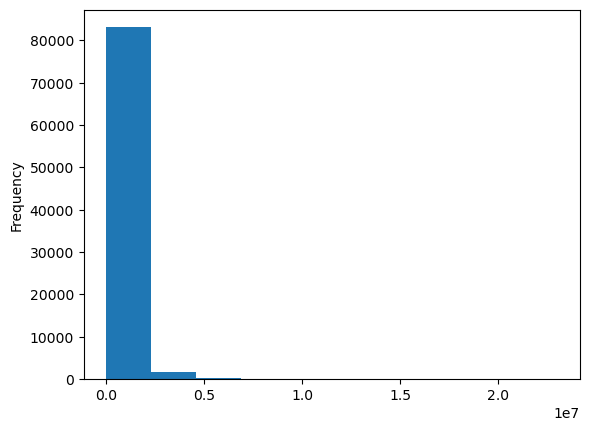

In [402]:
meta["lens"].plot.hist()

In [282]:
proc=list(meta["id"])
disc=disc[disc["id"].isin(proc)]


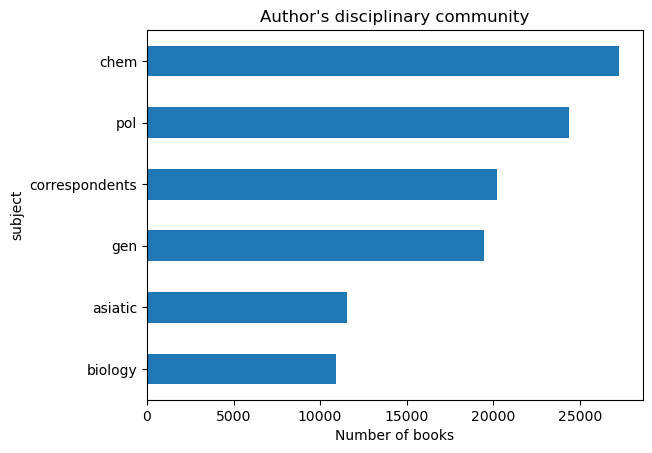

In [432]:
ax=disc["subject"].value_counts().plot.barh(title="Author's disciplinary community", xlabel="Number of books")
ax.invert_yaxis()

In [481]:
embs=["dom","oos", "soc", "echoesfrombackwo00levi_0" , "formofhorseasitl00cars"]


In [482]:
set(disc["subject"])

{'asiatic', 'biology', 'chem', 'correspondents', 'gen', 'pol'}

In [483]:
dup

,Unnamed: 0,orig_index,match_id,match_ind,score,source,id,date
2008707,561,238,chamberssjourna02chamgoog,10462,0.950464,formofhorseasitl00cars,chamberssjourna02chamgoog,1862
2008990,852,348,principlespsych02spengoog,2857,0.967941,formofhorseasitl00cars,principlespsych02spengoog,1881
2008991,853,348,principlespsych31spengoog,2827,0.967941,formofhorseasitl00cars,principlespsych31spengoog,1873
2012291,873,238,practicalphysio02actogoog,213,0.960269,formofhorseasitl00cars,practicalphysio02actogoog,1895
2012294,876,238,keytoghostismsc00mitcgoog,1049,0.957862,formofhorseasitl00cars,keytoghostismsc00mitcgoog,1880
...,...,...,...,...,...,...,...,...
2097025,5199,1175,perfecthorsehow00librgoog,682,0.966416,formofhorseasitl00cars,perfecthorsehow00librgoog,1873
2097026,5200,1176,perfecthorseho00murr,689,0.992839,formofhorseasitl00cars,perfecthorseho00murr,1873
2097027,5201,1176,perfecthorsehow00librgoog,683,0.992839,formofhorseasitl00cars,perfecthorsehow00librgoog,1873
2097030,5204,1179,perfecthorseho00murr,693,0.957608,formofhorseasitl00cars,perfecthorseho00murr,1873


In [548]:


from scipy.stats import chi2_contingency
 
# defining the table


In [619]:
out=[]
for e in embs:
    
    oos=merged[merged["source"]==e]
    counts = oos['match_id'].value_counts()
    #dup=oos[oos["score"]>0.95]
    dup=oos[oos['match_id'].isin(counts.index[counts > 10])]
    unique=dup.drop_duplicates(subset=["source", "match_id"])
    
    if e == "oos" or e=="formofhorseasitl00cars":
        date=1859
    if e=="dom":
        date=1871
    if e=="soc":
        date=1876
    if e=="spen":
        date=1865
    if e=="echoesfrombackwo00levi_0":
        date=1846
    temp=disc[disc["date"]>date]
    row=[]
    for c in set(disc["subject"]):
        len(unique)
        matches=list(temp[temp["subject"]==c]["id"])
        
        corr=unique[unique["match_id"].isin(matches)]
        a=len(corr)
        b=len(unique)-len(corr)
        c=len(matches)-len(corr)
        d=len(meta)-a-b-c
        mat=[[a, b], [c, d]]
        #print(a+c+d+b)
        stat, p, dof, expected = chi2_contingency(mat)
        #print(mat)
        
        row.append(p)
    out.append(row)

In [620]:
sims=pd.DataFrame(out)

In [621]:
sims.columns=["Natural Philosophy", "Politics", "Orientalism", "General", "Chemistry", "Darwin Contacts"]

In [622]:
sims.index = ['Descent of Man', 'Origin of Species', 'Principles of Sociology',"Echoes from the Backwoods", "The form of the horse"]

In [623]:
sims=-np.log(sims)

In [624]:
import seaborn as sns

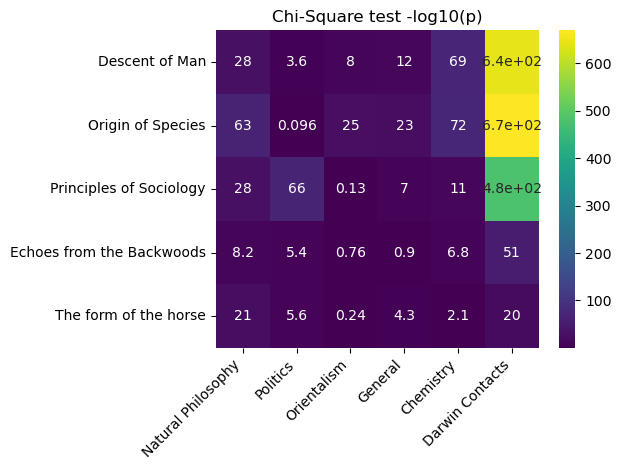

In [625]:

my_plot =sns.heatmap(sims, annot=True, cmap="viridis")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45,
                        horizontalalignment='right')
my_plot.set_title("Chi-Square test -log10(p)")
plt.tight_layout()
plt.savefig("chi2.svg")


In [632]:
oos=merged[merged["source"]=="formofhorseasitl00cars"]

In [646]:
oos[oos["date"]==1846]["match_id"].value_counts().head(11).index

Index(['echoesfrombackw00levigoog', 'cihm_45541',
       'McGillLibrary-rbsc_lc_echoes-from-the-backwoods_00536-v1-18218',
       'echoesfrombackw04levigoog', 'dli.bengal.10689.14183',
       'in.ernet.dli.2015.68965', 'in.ernet.dli.2015.21393',
       'dli.bengal.10689.22974', 'dli.bengal.10689.16681',
       'in.ernet.dli.2015.21385', 'dli.bengal.10689.23776'],
      dtype='object', name='match_id')

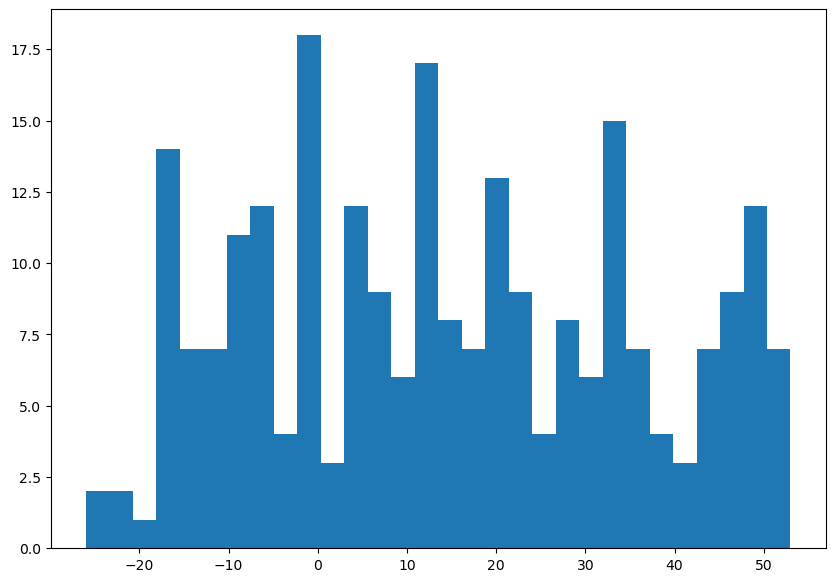

In [651]:
e="echoesfrombackwo00levi_0"
oos=merged[merged["source"]==e]
counts = oos['match_id'].value_counts()
dup=oos[oos["score"]>0.95]
#dup=oos[oos['match_id'].isin(counts.index[counts > 10])]
unique=dup.drop_duplicates(subset=["source", "match_id"])

if e == "oos" or e=="formofhorseasitl00cars":
    date=1859
if e=="dom":
    date=1871
if e=="soc":
    date=1876
if e=="spen":
    date=1865
if e=="echoesfrombackwo00levi_0":
    date=1846
dates=unique["date"]
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dates, bins=30)

# Show plot
plt.show()

In [654]:
dates=unique["date"].value_counts()

In [658]:
meta

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,subject,title,author,date,done,lens
0,0,0.0,0,acarimyriopodaet3118berl,"Canestrini, Giovanni","Acari, Myriopoda et Scorpiones hucusque in Ita...","['Berlese, Antonio, 1863-1927', 'Canestrini, G...",1882,1,4.241721
1,1,15.0,15,archivioperlazoo01cane,"Canestrini, Giovanni","Archivio per la zoologia, l'anatomia e la fisi...","['Canestrini, Giovanni, 1835-1900', 'Doria, G'...",1862,1,6.109370
2,2,17.0,17,pesci00cane,"Canestrini, Giovanni",Pesci,"Canestrini, Giovanni, 1835-1900",1872,1,5.752144
3,3,18.0,18,igamasiitaliani00canegoog,"Canestrini, Giovanni",I gamasi Italiani: monografia,"Giovanni Canestrini , R. Canestrini",1882,1,5.185381
4,4,19.0,19,lateoriadidarwi00canegoog,"Canestrini, Giovanni",La teoria di Darwin,Giovanni Canestrini,1880,1,5.755690
...,...,...,...,...,...,...,...,...,...,...
154032,9701,NaN,9701,paper-doi-10_1038_028122a0,journals,"Flora of Hampshire, including the Isle of Wigh...",JAMES BRITTEN,1883,1,4.147151
154033,9702,NaN,9702,paper-doi-10_1038_046197a0,journals,English Botany,JAMES BRITTEN,1892,1,4.128205
154034,9703,NaN,9703,paper-doi-10_1038_050316a0,journals,The Flora of Ceylon,JAMES BRITTEN,1894,1,4.117735
154035,9704,NaN,9704,protestantficti00britgoog,NaN,Protestant Fiction,James Britten,1899,1,5.482669


In [689]:
yr_cts=meta["date"].value_counts()

In [676]:
counts

date
1898    2228
1897    2172
1899    2155
1896    2149
1895    2112
        ... 
1808     131
1802     130
1804     126
1805     124
1800      51
Name: count, Length: 101, dtype: int64

In [683]:
dates

date
1800    0.000000
1801    0.000000
1802    0.000000
1803    0.000000
1804    0.000000
          ...   
1896    0.000931
1897    0.000460
1898    0.000898
1899    0.001856
1900    0.000000
Name: count, Length: 101, dtype: float64

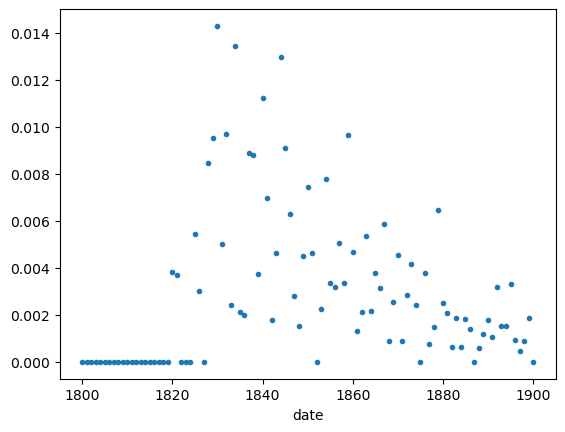

In [719]:
temp

,Unnamed: 0.1,Unnamed: 0,id,letter_name,title,author,date,subject
0,0,0,acarimyriopodaet3118berl,"Canestrini, Giovanni","Acari, Myriopoda et Scorpiones hucusque in Ita...","['Berlese, Antonio, 1863-1927', 'Canestrini, G...",1882,correspondents
1,15,15,archivioperlazoo01cane,"Canestrini, Giovanni","Archivio per la zoologia, l'anatomia e la fisi...","['Canestrini, Giovanni, 1835-1900', 'Doria, G'...",1862,correspondents
2,17,17,pesci00cane,"Canestrini, Giovanni",Pesci,"Canestrini, Giovanni, 1835-1900",1872,correspondents
3,18,18,igamasiitaliani00canegoog,"Canestrini, Giovanni",I gamasi Italiani: monografia,"Giovanni Canestrini , R. Canestrini",1882,correspondents
4,19,19,lateoriadidarwi00canegoog,"Canestrini, Giovanni",La teoria di Darwin,Giovanni Canestrini,1880,correspondents
...,...,...,...,...,...,...,...,...
188742,9701,9701,paper-doi-10_1038_028122a0,NaN,"Flora of Hampshire, including the Isle of Wigh...",JAMES BRITTEN,1883,biology
188743,9702,9702,paper-doi-10_1038_046197a0,NaN,English Botany,JAMES BRITTEN,1892,biology
188744,9703,9703,paper-doi-10_1038_050316a0,NaN,The Flora of Ceylon,JAMES BRITTEN,1894,biology
188745,9704,9704,protestantficti00britgoog,NaN,Protestant Fiction,James Britten,1899,biology


In [765]:
oos=merged[merged["source"]=="dom"]

In [770]:
t=oos[oos["date"]==1871]
t=t[t["score"]>0.95]

In [772]:
t.value_counts("match_id")

match_id
dieabstammungdes0102darw         334
ongenesisspecie00mivagoog        239
genesisofspecies00miva           188
Mivart1871gk14P                  150
b21954471                        112
ornithologyshak00hartgoog         53
lightandelectri00britgoog         31
miscellaneouswor00mac             17
groupofenglishme00mete             8
in.ernet.dli.2015.92917            7
hungariancelebr00wyat              7
historicalviewof00grah             7
groupofenglishme00meteuoft         7
b22300582                          7
wonderfulstorie00goddgoog          7
a591808200mannuoft                 7
b21902239                          7
royalinstitution00jonerich         7
60411780R.nlm.nih.gov              6
cu31924029047698                   4
historyofbirdsof1111dres           3
apracticaltreat03rockgoog          3
lightandelectricity00tyndrich      3
fragmentsofscien00tyndrich         3
jenaischezeitsc00natugoog          3
cu31924024732871                   3
lightelectricity00tynduoft   

In [782]:
out=[]
to_plot=pd.DataFrame()
for e in embs:
    
    oos=merged[merged["source"]==e]
    counts = oos['match_id'].value_counts()
    dup=oos[oos["score"]>0.95]
    #dup=oos[oos['match_id'].isin(counts.index[counts > 20])]
    unique=dup.drop_duplicates(subset=["source", "match_id"])
    #matches=list(disc[disc["subject"]=="correspondents"]["id"])
        
    #unique=unique[unique["match_id"].isin(matches)]
    if e == "oos" or e=="formofhorseasitl00cars":
        date=1859
    if e=="dom":
        date=1871
    if e=="soc":
        date=1876
    if e=="spen":
        date=1865
    if e=="echoesfrombackwo00levi_0":
        date=1846
    dates=unique["date"].value_counts()
    dates=dates/yr_cts
    dates.index=dates.index-date

    to_plot[e]=dates
    # Creating histogram
    #dates.plot(style='.')

    # Show plot
    #plt.show()


In [794]:
to_plot=to_plot[-60:]

In [795]:
to_plot=to_plot.reset_index()

In [825]:
to_plot.columns=["index", "Years before/after publication", "Descent of Man", "Origin of Species", "d", "s", "Form of the Horse"]

In [820]:
to_plot[30:]["formofhorseasitl00cars"].mean()

0.002035179078667386

In [821]:
to_plot[:30]["formofhorseasitl00cars"].mean()

0.00193646707839996

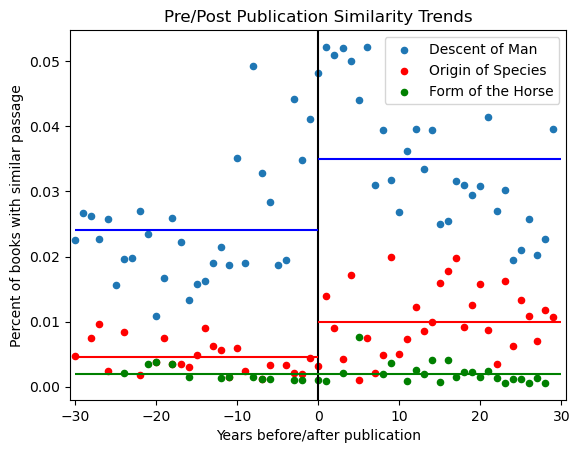

In [837]:
ax = to_plot.plot(kind="scatter",x="Years before/after publication", y="Descent of Man", label="Descent of Man")
to_plot.plot(kind="scatter",x="Years before/after publication", y="Origin of Species",label="Origin of Species", c="r", ax=ax)
to_plot.plot(kind="scatter",x="Years before/after publication", y="Form of the Horse",label="Form of the Horse", c="g", ax=ax)
plt.axvline(x = 0, color = 'black')
plt.hlines(y= 0.0045,xmin=-30, xmax=0, color = 'r')
plt.hlines(y= 0.01,xmin=0, xmax=30, color = 'r')

plt.hlines(y= 0.024,xmin=-30, xmax=0, color = 'b')
plt.hlines(y= 0.035,xmin=0, xmax=30, color = 'b')


plt.hlines(y= 0.002,xmin=-30, xmax=0, color = 'g')
plt.hlines(y= 0.002,xmin=0, xmax=30, color = 'g')
plt.margins(x=0.01)
#plt.axvline(x = 1871, color = 'b', label = 'axvline - full height')

ax.set_title('Pre/Post Publication Similarity Trends')

ax.set_ylabel('Percent of books with similar passage')
ax.legend()
plt.savefig("timeline.svg")

plt.show()


In [ ]:
oos=oos[oos["score"]>0.95]

In [225]:
corr=list(disc[disc["subject"]=="asiatic"]["id"])
corr=merged[merged["match_id"].isin(corr)]

In [234]:
high=corr[corr["score"]>0.95]

In [235]:
unique=high.drop_duplicates(subset=["source", "match_id"])

In [236]:
temp=unique[unique["source"]=="oos"]
temp[temp["date"]==1860]

,Unnamed: 0,orig_index,match_id,match_ind,score,source,id,date
1216800,95227,1616,biostor-89306,1,0.976509,oos,biostor-89306,1860
1640175,5327,2106,b22268789,102,0.966568,oos,b22268789,1860


In [237]:
dates=unique[unique["source"]=="oos"]["date"]

In [238]:
len(dates)

40

In [239]:
dates.value_counts()

date
1880    3
1894    3
1875    3
1879    2
1896    2
1890    2
1888    2
1860    2
1887    2
1899    2
1882    2
1895    2
1891    1
1867    1
1884    1
1846    1
1856    1
1874    1
1828    1
1841    1
1876    1
1881    1
1843    1
1840    1
1889    1
Name: count, dtype: int64

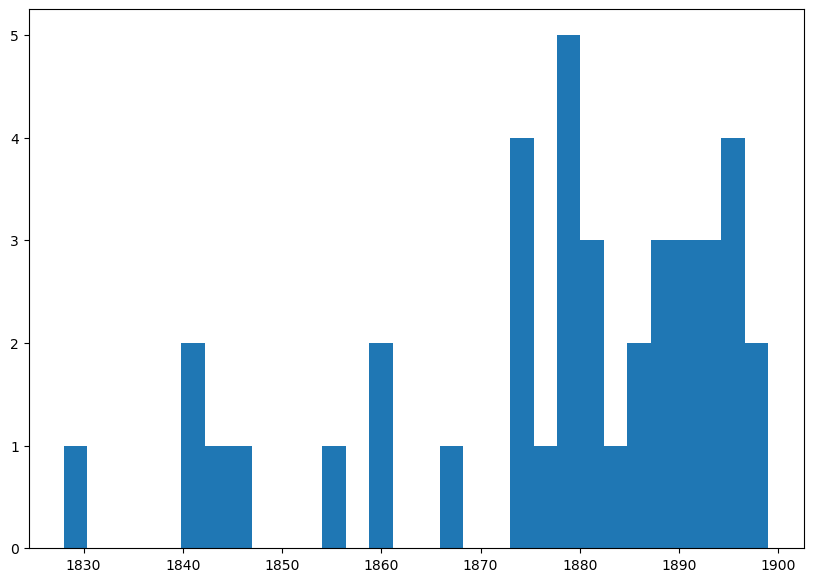

In [45]:
meta

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,subject,title,author,date,done,lens
0,0,0,0,acarimyriopodaet3118berl,"Canestrini, Giovanni","Acari, Myriopoda et Scorpiones hucusque in Ita...","['Berlese, Antonio, 1863-1927', 'Canestrini, G...",1882,1,0
1,1,15,15,archivioperlazoo01cane,"Canestrini, Giovanni","Archivio per la zoologia, l'anatomia e la fisi...","['Canestrini, Giovanni, 1835-1900', 'Doria, G'...",1862,1,0
2,2,17,17,pesci00cane,"Canestrini, Giovanni",Pesci,"Canestrini, Giovanni, 1835-1900",1872,1,0
3,3,18,18,igamasiitaliani00canegoog,"Canestrini, Giovanni",I gamasi Italiani: monografia,"Giovanni Canestrini , R. Canestrini",1882,1,0
4,4,19,19,lateoriadidarwi00canegoog,"Canestrini, Giovanni",La teoria di Darwin,Giovanni Canestrini,1880,1,0
...,...,...,...,...,...,...,...,...,...,...
134309,134309,131624,131624,repositoryofwith00byr,pol,The repository of wit and humor; comprising mo...,"Byrn, M. Lafayette (Marcus Lafayette), 1826-19...",1853,0,0
134310,134310,131625,131625,repositoryofwith00byrn,pol,The repository of wit and humor : comprising m...,"Byrn, M. Lafayette (Marcus Lafayette), 1826-1903",1856,0,0
134311,134311,131626,131626,the-complete-practical-brewer,pol,The Complete Practical Brewer,"Byrn, M. Lafayette (Marcus Lafayette), 1826-1903",1852,0,0
134312,134312,131627,131627,twentywaystomake00byrn,pol,"Twenty ways to make money, a valuable collecti...","Byrn, M. Lafayette (Marcus Lafayette), 1826-1903",1869,0,0


In [6]:
def filt(sents):
    ret=[]
    for s in sents:
        if len(s)>45:
            ret.append(s)
    return ret

In [7]:
f = open("oos.txt", "r", encoding="utf-8")
text=f.read()
f.close()
text=text.replace("\n"," ")
text=text.split("When on board H.M.S. ‘Beagle,’ as naturalist,")[1]
text=text.split("from so simple a beginning endless forms most beautiful and most wonderful have been, and are being, evolved.")[0]
text+="from so simple a beginning endless forms most beautiful and most wonderful have been, and are being, evolved."
text=text.strip()
oos = filt(sent_tokenize(text))

In [10]:
file = open('vec_oos.pickle', 'rb')
emb_oos = pickle.load(file)

In [12]:
ad=sc.AnnData(emb_oos)

In [18]:
ad

AnnData object with n_obs × n_vars = 3822 × 384
    uns: 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [25]:
sc.pp.neighbors(ad, n_neighbors=5)

In [30]:
sc.tl.leiden(ad)

In [26]:
sc.tl.umap(ad)

C:\Users\lucia\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


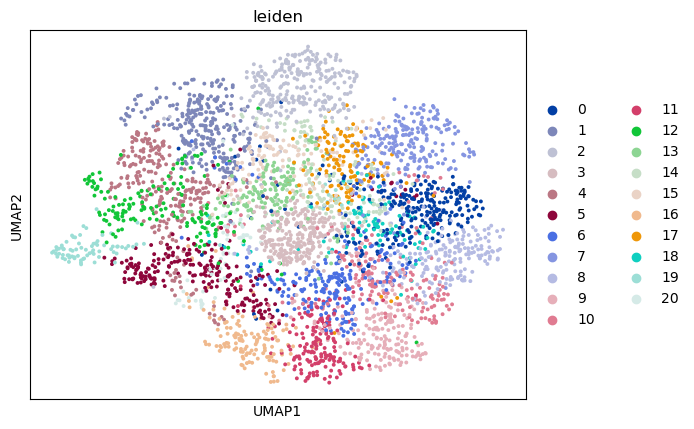

In [32]:
sc.pl.umap(ad, color="leiden")